<a href="https://colab.research.google.com/github/hanna-joo/statistics/blob/master/stat_python/ch_11_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11장. 회귀분석

- 가장 널리 알려지고 활용되는 기법
- 독립변수가 아무리 크거나 작더라도, 종속변수는 __종속변수 집단의 평균으로 접근__한다는 뜻

## 11.1 회귀분석 기초

- __회귀분석__ 
  - 하나 이상의 수치형 변수들을 독립변수로, 또 다른 결과적 수치형 변수를 종속변수로 설정

  - 개별 독립변수의 변화가 종속변수의 변화에 어떻게 영향을 미치는지 판단

  - 독립변수들의 값이 주어졌을 때 __종속변수 값을 예측__ or 독립변수와 종속변수간의 __인과관계를 검증__할 수 있는 통계 기법  
  
---

- 독립변수, 종속변수의 개수와 형태에 따라 다양한 모형으로 분류

- __단순회귀모형__ : 1개의 수치형 독립변수, 1개의 수치형 종속변수, 모두 수치형 변수일 때

- __다중회귀모형__ : 2개 이상의 수치형, 범주형 독립변수, 1개의 수치형 종속변수
  - 범주형 독립변수일 경우 더미변수(dummy variable)로 전환하여 회귀모형에 포함

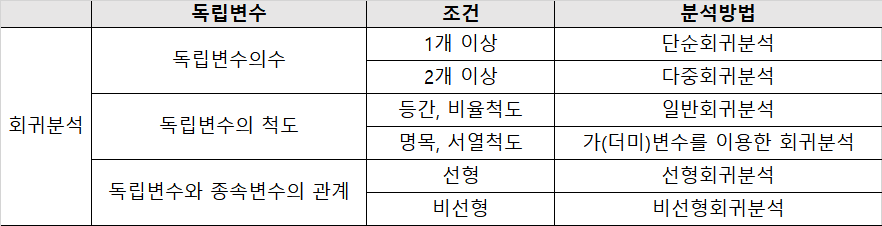

- 회귀분석을 실행하기 위해서는 다음과 같은 전제조건을 충족하여야 함
      (선형성) 독립변수와 종속변수 간에는 선형관계가 존재한다.
      (등분산성) 잔차들은 동일한 분산을 갖는다.
      (독립성) 잔차들은 서로 독립이다.
      (정규셩) 잔차는 평균이 0이고 분산이 sigma^2인 정규분포를 따른다.

## 11.2 단순회귀분석

### [1] 개념 및 주요 이론
- __1개의 수치형 독립변수__(예 : 고객만족도)가 __1개의 수치형 종속변수__(예 : 고객 구매액)에 어떠한 영향을 미치는지 검정하는 통계분석기법
- 고객만족도, 고객 구매액간의 __연관성은 상관관계 분석을 통해서 검증__ 가능
  - 그러나, 고객만족도 -> 구매액 혹은 구매액 -> 고객만족도 영향의 방향은 회귀분석이 필요
- 독립변수 X와 Y 종속변수를 갖는 단순회귀모형은 다음과 같음  


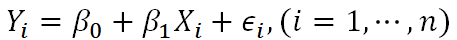

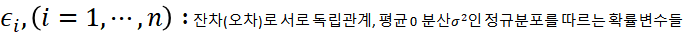

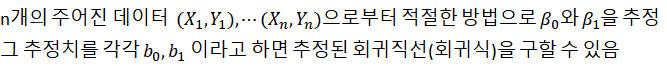

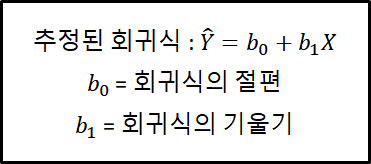

- 회귀분석과 관련된 다음의 방법을 알아보고자 함
  - 모형을 도출하는 방법 
  - 설명력을 나타내는 방법
  - 모형이 적합한가에 대해 객관적으로 확인하는 방법

---

- __최소제곱법__ : 회귀분석에서 가장 적절한 회귀 직선을 구하는 방법(회귀 모형 추정) 중 하나
  - 최소제곱법은 다음과 같이 오차제곱합을 최소로 하는 절편(beta_0)과 기울기(beta_1)를 구하는 것

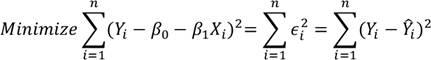

> 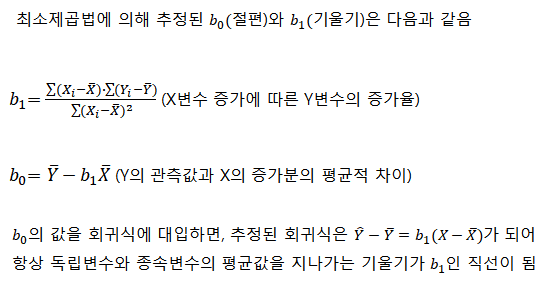

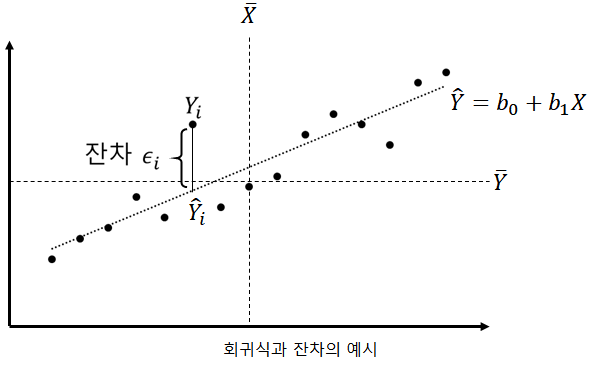

- __결정계수__ : 회귀선의 설명력을 나타내는 지표
  - R^2을 주로 사용
  - 항상 0과 1사이의 값을 가짐 (100을 곱하여 %로 나타내기도 함)
    - 1에 가까울수록 회귀직선의 설명력이 높다고 할 수 있음
  
  - 단순회귀모형에서의 결정계수는 항상 __독립변수와 종속변수 간의 상관계수의 제곱__
    - 예 : 두 변수간 상관계수가 0.9 또는 -0.9 일 때, 결정계수는 0.81(또는 81%)가 됨
      - 이러한 경우 총 제곱합 중 약 81%가 적합된 회귀직선(또는 독립변수에 의해)에 의해 설명된다고 해석


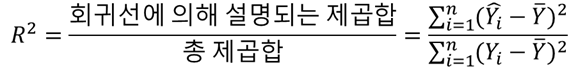

- __회귀분석의 적합성 평가__
  1. 분산분석표를 이용하는 방법 : 분산분석을 통해 얻은 결과에 대한 통계적 유의성을 검정하는 방법

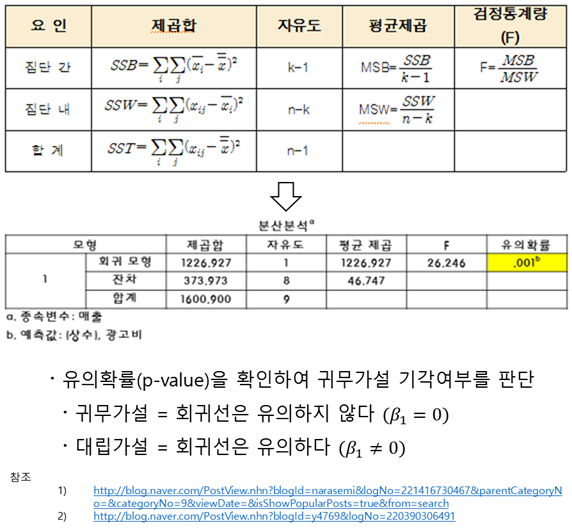

- __회귀분석의 적합성 평가__
  2. 모형 적합 후 나타나는 잔차들을 통해서 확인 : 잔차그림을 통해 회귀모형의 가정들을 확인
    - 잔차 : |실제 종속변수의 값 - 회귀식으로 부터 추정된 종속변수의 값|
  - 종속변수 추정치와 잔차간의 산점도 / 독립변수와 잔차간의 산점도를 통해 회귀모형의 가정을 체크
    - 회귀진단 결과 가정이 적합하지 않을 경우 회귀모형을 수정해야 함

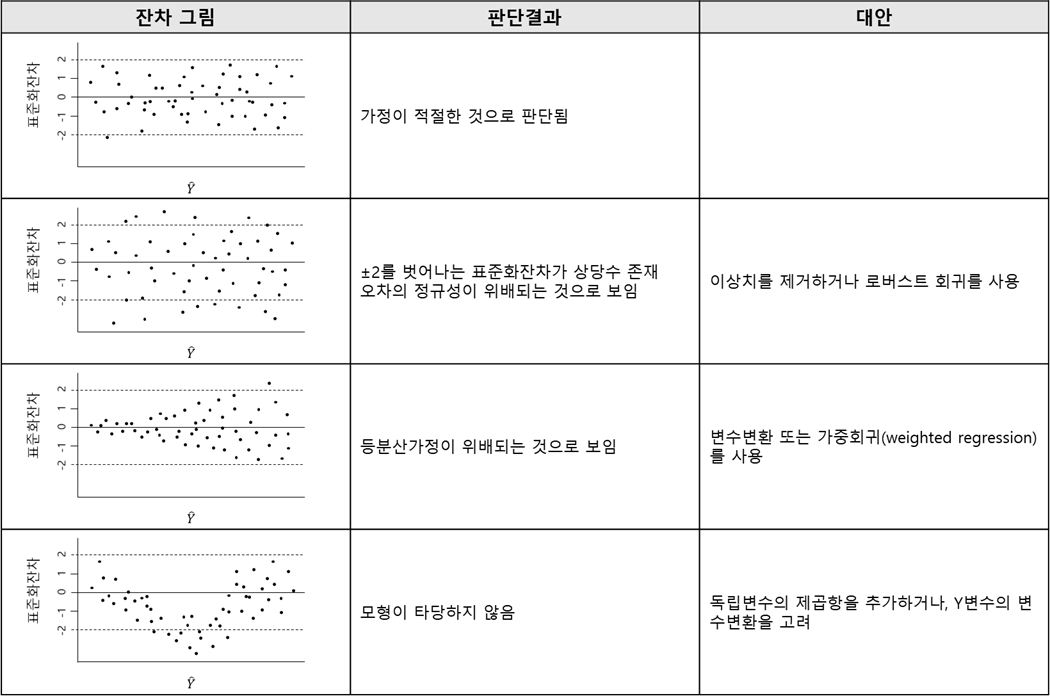

### [2] 분석 및 해석
- A 쇼핑의 방문빈도와 총 매출액의 인과관계를 회귀분석을 통해 살펴보자
  - 귀무가설 = 방문빈도는 총 매출액에 영향을 미치지 않는다.
  - 연구가설 = 방문빈도는 총 매출액에 영향을 미친다.

In [ ]:
# 1. 모듈 및 데이터 탑재
import pandas as pd
import statsmodels.formula.api as smf   # 서브모듈 formula.api는 수식 문자열과 데이터프레임을 사용해 모델을 편리하게 사용할 수 있는 함수 지원

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/statistics/data/Ashopping.csv',sep=',',encoding='cp949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [ ]:
# 2. 단순회귀분석 실행하기
model1 = smf.ols(formula='총_매출액~방문빈도',data=df).fit()    # ols(formula='종속변수~독립변수',data=data1) 형식으로 사용
model1.summary()                                                # 분석결과값은 데이터에 적합된 모형 객체에 summary()함수를 이용해 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총_매출액   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     660.8
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          3.05e-112
Time:                        14:31:22   Log-Likelihood:                -16921.
No. Observations:                1000   AIC:                         3.385e+04
Df Residuals:                     998   BIC:                         3.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.572e+06   2.74e+05      5.743      0.000    1.03e+06    2.11e+06
방문빈도        2.066e+05   8037.616     25.707      0.000    1.91e+05    2.22e+05
==============================================================================
Omnibus:                      684.213   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17231.472
Skew:                           2.760   Prob(JB):                         0.00
Kurtosis:                      22.573   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 출력된 첫 번째 테이블은 회귀분석 결과의 일반적인 사항을 요약한 내용
      Dep.Variable : 종속변수
      R-squared : 결정계수 (설명력)
      Model : 분석모델
      Adj. R-square : 조정 결정계수
      Method : Model의 계산방식
      F-statistics : 해당 회귀모형의 적합도를 나타내는 통계량
      Prob (F-statistics) : F 검정통계량의 유의확률 (본 회귀모형은 0.01 이하이므로 유의미하다고 판단)
      Df Residuals : 잔차의 자유도
      DF Model : 매개변수 수
      AIC, BIC : 복수 개 모형의 적합도를 비교할 때 사용, 해당 통계량이 작을수록 좋은 모형이라고 판단
                (본 실습에서는 1개의 모형만 사용했으므로 해당 사항 없음)

- 두 번째 테이블은 모형에 의해 추정된 회귀계수 테이블
      coef : 회귀계수
      std err : 계수 추정치의 기본 표준오차
      t : t-value
      P>|t| : 유의 확률
      [0.025 0.975] : 95% 구간의 하한, 상한값
  - 절편(intercept)과 독립변수(방문빈도)는 모두 유의하게 나타남

- 마지막 테이블은 잔차의 분포를 평가하기 위한 몇 가지 통계량 출력
      Omnibus : 잔차의 왜도와 첨도를 이용한 검정 통계량
                0에 가까운 값이 나올수록 정규분포를 따름
      Prob(Omnibus) : Omnibus의 p-value, 귀무가설로써 정규분포인지를 평가
      Skew, Kurtosis : 왜도와 첨도
      Durbin-Watson : 회귀분석 시 잔차의 독립성을 검증할 때 사용되는 통계량
                      0~4까지의 값이 출력, 2에 가까울수록 독립적이라고 판단
      Jarque-Bera(JB)/Prob(JB) : Omnibus와 유사하게 잔차의 왜도와 첨도를 이용해 정규성을 검정하는 통계량
      Condition Number : 다중공선성을 평가할 수 있는 통계량
                         30보다 작은 숫자가 나왔을 경우 다중공선성이 없다고 판단
                         (본 실습에서는 하나의 독립변수만 사용했으므로 무의미함)

  - 본 모델에 대한 산출 결과 내용은 다음과 같이 요약할 수 있음
    - Omnibus의 값이 684.213, JB의 값이 17231로 __잔차의 분포는 정규분포가 아님__
    - Durbin-Watson의 값이 1.972로 __잔차는 서로 독립적__

In [ ]:
# 1. 모듈 탑재
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 2. 선형회귀선 구하기
fit = np.polyfit(df['방문빈도'],df['총_매출액'],1)    # ployfit(data1, data2, n) : data1=독립변수, data2=종속변수, n=다항식의 차수
                                                        # ols() 함수를 이용하여 생성된 계수(coef)값과 동일한 것을 확인할 수 있음
fit_fn = np.poly1d(fit)                               # ploy1d(data) : ployfit()으로 생성한 객체를 함수식 형태로 변환
print(np.round(fit,3))                                # round(data, n) : data 값을 n자리에서 반올림 (n>0 : 소수점 자리 수)
print(fit_fn)

[ 206622.163 1572126.981]
 
2.066e+05 x + 1.572e+06


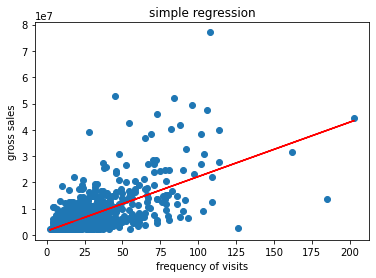

In [ ]:
# 3. 산점도와 선형회귀선 그리기
%matplotlib inline
plt.title('simple regression')    # 차트 제목
plt.xlabel('frequency of visits') # X축 이름
plt.ylabel('gross sales')         # Y축 이름
plt.plot(df['방문빈도'],df['총_매출액'],'o')          # 파라미터 'o' : 원형 점으로 표현
plt.plot(df['방문빈도'],fit_fn(df['방문빈도']),'r')
plt.show()

- 결과 해석
  - 앞서 도출한 분석결과의 유의확률은 0.00이하 이므로 통계적으로 유의
  - 회귀모형은 총 매출액의 __39.8%를 설명__
    - 매출액에 영향을 줄 수 있는 다른 요인도 찾는 방안을 모색해야 함
  - 회귀식은 __^Y_i = 1,570,000 + 206,000 X '방문빈도'__가 됨
    - 방문빈도가 1회 높아질수록 총 매출액은 약 206,000원 증가
    - 방문 횟수를 높이는 방안을 고려해야 함

## 11.3 다중회귀분석
- 독립변수가 여러 개인 경우
- 단순회귀분석에 비해 활용도가 매우 높고, 실제 자료를 분석하는데 매우 유용

### [1] 개념 및 주요 이론
- 2개 이상의 독립변수가 수치형 종속변수에 어떠한 영향을 미치는지 검정하는 통계분석기법

  - 예 : 서비스만족도, 방문횟수, 거래기간 -> 총 구매액

- i개의 독립변수가 있는 다중회귀모형은 다음과 같음  


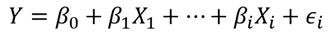

- 단순회귀모형에서와 마찬가지로 __잔차제곱합을 최소화하는 최소제곱법__에 의해 회귀모수를 추정할 수 있음

- 추정된 회귀계수를 b라고 할 때 적합된 회귀식은 다음과 같음  

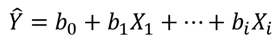

- __결정계수(R^2)__는 다중회귀분석에 있어서도 __설명력__을 나타내는 지표로 활용

  - 그러나 독립변수가 추가됨에 따라 결정계수 값이 증가하기 때문에, 값이 높은 모형이 좋은 모형이라고 단정할 수 없음

    - __불필요한 독립변수가 추가되어도 결정계수 값 증가__

- 이에 대한 방안으로 __수정결정계수(Adjusted R^2)__를 사용

  - 독립변수 추가함에 따라 수정결정계수는 __증가하다가 다시 감소하기 때문__

  - 때문에 수정결정계수가 최대가 되도록 모형 선택 가능

- __다중공선성__

  - 독립변수들 중에서 상관관계가 높은 변수들이 존재

  - 독립변수들 간에 선형관계가 존재

- 다중공선성이 높은 경우 발생하는 문제점

  - 추정된 회귀계수들의 분산이 커지기 때문에, 신뢰불가능  

- 다중공선성이 높은 경우 대안

  - 상관관계가 높은 변수들 중 일부를 제거하여 재적합

  - 주성분회귀(Principal Component Regression) 또는 능형회귀(Ridge Regression) 등의 새로운 통계 모형을 적용

- 다중공선성을 판별하는 지표 : __분산팽창계수(VIF : Variance Inflation Factor)__

  - 독립변수에 대응되는 분산팽창값은 다음과 같이 정의

  - 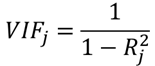

  - 여기서의 결정계수는 X_j를 종속변수, 나머지 독립변수들을 독립변수로 하는 다중회귀모형을 적합시켰을 때 얻어지는 결정계수

    - 이 결정계수 값이 1에 가까운 것 -> X_j가 다른 독립변수들과 강한 선형관계가 존재함을 의미
  
      - VIF_j값도 증가
  
  - __VIF 값이 10보다 크면__ 다중공선성이 있는 것으로 판단

- __독립변수 선택 방법__
  - 다중공선성의 문제를 제거, 중요한 변수들만 선택하여 모형을 개발하는 것이 중요
  
  - 좋은 회귀모형은 적은 수의 독립변수로 종속변수의 분산을 많이 설명하는 모형
  
  - 독립변수를 선택하기 위한 방법은 다음과 같음

    1. 전체입력 : 임의로 지정한 모든 변수를 독립변수로 사용

    2. 전진선택 : 중요한 변수순서로 하나씩 선택해 나가는 방법
      - 먼저 한 개의 독립변수로 회귀분석을 진행
      - F 값이 가장 큰 모형을 찾아 그 변수를 가장 먼저 선택

    3. 후진제거 : 불필요한 변수를 하나씩 제거해 나가는 방법
      - 모든 변수를 독립변수로 시작
      - 유의하지 않은 변수들이 포함되어 있으면 하나씩 제거하며 분석 진행

    4. 단계선택 : 전진, 후진을 결합한 방식
      - 전진선택을 이용해 하나씩 선택해 나감과 동시에
      - 다중공선성이 높게 나타나는 변수를 후진제거하는 방식

### [2] 분석 및 해석
- A 쇼핑 데이터에서 서비스 만족도, 방문빈도, 구매카테고리 수가 총 매출액에 미치는 영향을 다중회귀분석으로 살펴보고자 함

  - 귀무가설 = 서비스 만족도, 방문빈도, 구매카테고리 수는 총 매출액에 영향을 미치지 않는다.

  - 연구가설 = 서비스 만족도, 방문빈도, 구매카테고리 수는 총 매출액에 영향을 미친다.

In [ ]:
# 1. 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices                                                     # 회귀분석 전처리를 지원, 데이터프레임을 가공하여 인코딩, 변환 등을 쉽게 할 수 있도록 지원
from statsmodels.stats.outliers_influence import variance_inflation_factor      # 단순회귀분석과 관련된 기능 제공, 분산팽창값 구하는 함수를 사용하기 위해 호출

df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [ ]:
# 2. 다중회귀분석 실행
model2 = smf.ols(formula='총_매출액~서비스_만족도+방문빈도+구매_카테고리_수',data=df).fit()     # smf.ols(fourmula='종속~독립1+독립2+독립3', data=data1)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총_매출액   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          1.19e-113
Time:                        14:31:22   Log-Likelihood:                -16911.
No. Observations:                1000   AIC:                         3.383e+04
Df Residuals:                     996   BIC:                         3.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.033e+06   1.01e+06      2.009      0.045    4.76e+04    4.02e+06
서비스_만족도    -5.432e+05   1.52e+05     -3.585      0.000   -8.41e+05   -2.46e+05
방문빈도        2.053e+05   8938.286     22.973      0.000    1.88e+05    2.23e+05
구매_카테고리_수   5.022e+05    1.6e+05      3.142      0.002    1.89e+05    8.16e+05
==============================================================================
Omnibus:                      673.428   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16237.956
Skew:                           2.711   Prob(JB):                         0.00
Kurtosis:                      21.982   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 3. 다중공선성 확인하기
y, X = dmatrices('총_매출액~서비스_만족도+방문빈도+구매_카테고리_수', data=df, return_type='dataframe')   # 다중공선성을 구하기 전 데이터를 전처리해주는 역할 함수
print(np.round(variance_inflation_factor(X.values, 1),3))   # 서비스 만족도 VIF 값
print(np.round(variance_inflation_factor(X.values, 2),3))   # 방문빈도 VIF 값
print(np.round(variance_inflation_factor(X.values, 3),3))   # 구매 카테고리수 VIF 값

1.139
1.259
1.215


- 첫번째 테이블

  - F 값 230.8, Prob(F-statistic)<0.000 으로 회귀모형은 유의

  - Adj. R-squared값은 0.408로 설명력은 약 40.8%

- 두번째 테이블
  - 절편, 각 독립변수들 모두 95% 신뢰수준에서 유의하게 평가
  
  - 도출된 다중회귀모형은
  
    - 총_매출액 = 2033000+205300*방문빈도+502200*구매카테고리수-543200*서비스만족도
  
  - 잔차 통계량의 경우 특이점을 보이지 않음

- VIF값 확인 결과
  - 모두 10이하이므로 다중공선성 문제는 없다고 볼 수 있음

- 결과해석
  - 독립변수 3가지 모두 유의
    - 서비스 만족도는 오히려 음의 영향력을 주는 것으로 나타남
      - 심도 있는 조사가 필요
  - 방문빈도의 영향력 < 구매 카테고리 수의 영향력
    - 고객이 구매하는 품목을 확대하는 교차판매 전략을 전개해야 할 것

## 11.4 더미변수를 이용한 회귀분석

- 성별, 직업, 지역 등과 같은 범주형 변수가 포함되는 경우 발생
  - 이러한 경우 더미변수를 통해 범주형 변수를 회귀모형에 포함 시킬 수 있음

### [1] 개념 및 주요 이론
- 더미변수를 활용한 회귀분석은 분류형, 범주형 독립변수를 추가하여 인과관계를 검증하는 통계분석기법

- 더미변수 설정 방법
  - 더미변수의 개수는 __해당 범주형 변수의 수준 수 - 1개__
    - 예시 : 연령대 4개의 수준값 범주형 변수 (20대, 30대, 40대, 50대)
      - 3개의 더미변수 V1, V2, V3를 도입
        - V1 변수는 '30대'이면 1 아니면 0
        - V2 변수는 '40대'이면 1 아니면 0
        - V3 변수는 '50대'이면 1 아니면 0
        - V1, V2, V3 모두 0이면 '20대' 

    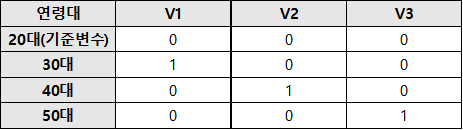

  - 더미변수를 이용한 다중회귀모형은 다음과 같은 형태임

  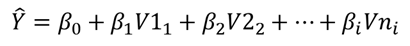

- 결과 해석 방법
  - 위의 연령대에 따른 회귀모형을 이용하여 구체적인 예시를 살펴보고자 함

  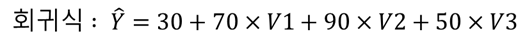

      20대는 연령대를 나타내는 더미변수의 기준이 됨
      30대는 20대에 비해 매출액이 70만원 많음
      40대는 20대에 비해 매출액이 90만원 많음
      50대는 20대에 비해 매출액이 50만원 많음
  
  - 만약 각 회귀계수의 유의확률에 따라 __유의한 계수, 유의하지 않은 계수__로 나뉠 경우가 발생한다면,
    
    - V3만 유의, V1와 V2가 유의하지 않을 경우
     
      - '50대는 20대(기준범주)에 비해 매출액이 50만원 더 많을 것임' 해석 가능

      - 나머지 연령대에 대해서는 특별히 매출액에 대한 차이가 없다고 판단 

### [2] 분석 및 해석
- A 쇼핑 데이터에서 구매유형이라는 범주형 데이터를 더미변수화하여 방문빈도를 예측하는 회귀모형을 만들어보고자 함
  - 귀무가설 = 각각의 구매유형은 방문빈도에 영향을 미치지 않는다.
  - 연구가설 = 각각의 구매유형은 방문빈도에 영향을 미친다.

In [ ]:
# 1. 모듈 및 데이터 탑재
import pandas as pd
import statsmodels.formula.api as smf
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [ ]:
# 2. 더미변수 생성
df2 = pd.get_dummies(df['구매유형'], prefix='구매유형', drop_first=True)    # get_dummies(data, prefix='더미변수명', drop_first=True/False), drop_first는 첫번째 범주를 기준범주로 사용할 것인지(Ture) 여부를 표현
df3 = pd.concat([df,df2], axis=1)
df2.head()

,구매유형_2,구매유형_3,구매유형_4
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [ ]:
# 3. 더미변수를 이용한 회귀분석
Model3 = smf.ols(formula = '방문빈도 ~ 구매유형_2 + 구매유형_3 + 구매유형_4', data=df3).fit()
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   방문빈도   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          8.42e-122
Time:                        14:34:53   Log-Likelihood:                -4193.5
No. Observations:                1000   AIC:                             8395.
Df Residuals:                     996   BIC:                             8415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0233      2.450      4.092      0.000       5.216      14.830
구매유형_2        36.9736      2.611     14.163      0.000      31.851      42.096
구매유형_3         7.3517      2.792      2.634      0.009       1.874      12.830
구매유형_4         7.6602      2.554      3.000      0.003       2.649      12.671
==============================================================================
Omnibus:                      754.728   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18540.829
Skew:                           3.215   Prob(JB):                         0.00
Kurtosis:                      23.091   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 결과 해석
  - F 통계량 252.4이고, 유의확률 0.01 이하이므로 본 회귀모형 유효
  
  - 설명력은 약 43%, 절편을 포함한 모든 더미변수들 또한 유의
  
  - 도출된 회귀식은 ^Y = 10.023 + 36.974 * D1 + 7.352 * D2 + 7.660 * D3
    - 구매유형_1 : 1회성 구매 고객들의 방문횟수 = 10.023회
    - 구매유형_2 : 실용적 구매 고객들의 방문횟수 = 46.997회
    - 구매유형_3 : 명품 구매 고객들의 방문횟수 = 17.375회
    - 구매유형_4 : 집중 구매 고객들의 방문횟수 = 17.683회
  
  - 위와 같이 예측할 수 있음